Análisis 'Reporte Base'
 ==========

Comienzo cargando todos los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import datetime
from datetime import timedelta  
import timeboard as tb # turnos 

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


#otro graficador
import seaborn as sns

#stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/home/egidio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# cargo algunos scripts que me suelen servir para análisis

In [3]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())


['/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc']

# Cargo la BD

In [4]:
BD = pd.read_pickle('./BD/eSAMU.pkl')

In [5]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

Accidentes y Traumas           23.884862
Dolor o Problema específico    23.017608
Traslados                      18.107100
Consciencia                    11.678898
Sin patología urgencia          8.894796
Otro                            7.537670
Colapso                         4.836120
Intoxicación                    2.042945
Name: Motivo del Llamado, dtype: float64

Tr. Especialista                                    10.258271
Accidente vehicular o transporte. Atropellos         8.579101
Caídas leves                                         6.332042
Compromiso de conciencia                             6.254026
Dificultad respiratoria leve - moderada (disnea)     5.834006
Fallecido                                            4.518611
Malestar general adulto mayor                        3.955258
Accidente múltiples víctimas (cualquier razón)       3.766567
Tr. Exámen o Procedimiento                           3.374670
Otros                                                2.629884
Dolor de pecho                                       2.582711
Convulsiones                                         2.555496
Dolor o problemas abdominal                          2.394020
Problemas de Diabetes                                2.127312
Enfermedad terminal, dolor de cancer, agonico.       2.048388
Name: Submotivo del Llamado, dtype: float64

Prioridad,S1,S2,S3,S4,S5,Total
Submotivo del Llamado,,,,,,
Tr. Especialista,1166,4022,3769,727,14,9698
Accidente vehicular o transporte. Atropellos,7229,801,75,19,4,8128
Compromiso de conciencia,1462,2279,1284,210,40,5275
Caídas leves,631,2063,1915,196,32,4837
Dificultad respiratoria leve - moderada (disnea),275,1706,2466,274,35,4756
Fallecido,20,35,286,3728,530,4599
Accidente múltiples víctimas (cualquier razón),3624,241,34,1,1,3901
Malestar general adulto mayor,63,635,1626,393,47,2764
Tr. Exámen o Procedimiento,300,973,1113,321,15,2722


Prioridad,S1,S2,S3,S4,S5
Submotivo del Llamado,,,,,
Tr. Especialista,1166,4022,3769,727,14
Accidente vehicular o transporte. Atropellos,7229,801,75,19,4
Compromiso de conciencia,1462,2279,1284,210,40
Caídas leves,631,2063,1915,196,32
Dificultad respiratoria leve - moderada (disnea),275,1706,2466,274,35
Fallecido,20,35,286,3728,530
Accidente múltiples víctimas (cualquier razón),3624,241,34,1,1
Malestar general adulto mayor,63,635,1626,393,47
Tr. Exámen o Procedimiento,300,973,1113,321,15


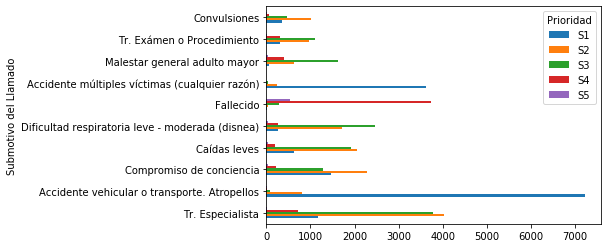

In [6]:
BD['Motivo del Llamado'].value_counts(normalize=True)*100
BD['Submotivo del Llamado'].value_counts(normalize=True).head(15)*100
dum = pd.crosstab(BD['Submotivo del Llamado'],
            BD.Prioridad, 
            margins=True,
            margins_name = 'Total'
           ).sort_values('Total', ascending=False)
dum.drop('Total').head(10)
tab = pd.crosstab(BD['Submotivo del Llamado'],
            BD.Prioridad,
            margins=True,
            margins_name = 'All'
           ).sort_values('All', ascending=False)

tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.head(10)
tab.head(10).plot(kind='barh')

In [7]:
for x in BD['Motivo del Llamado'].unique():
    print(x)
    BD.loc[BD['Motivo del Llamado']== x]['Submotivo del Llamado'].value_counts(normalize=True).head(5)*100

Accidentes y Traumas


Accidente vehicular o transporte. Atropellos      35.918569
Caídas leves                                      26.510692
Accidente múltiples víctimas (cualquier razón)    15.769684
Caídas graves                                      6.908732
Agresiones, ataques, asalto                        6.190892
Name: Submotivo del Llamado, dtype: float64

Consciencia


Compromiso de conciencia                           53.549790
Enfermedad Psiquiátrica o agitación psicomotora    14.641914
Lipotimia recuperada                               14.587541
Comportamientos extraños                           13.189374
Focalidad Neurológica. Compromiso neurologico       4.023613
Name: Submotivo del Llamado, dtype: float64

Dolor o Problema específico


Dificultad respiratoria leve - moderada (disnea)    25.345840
Dolor de pecho                                      11.220589
Dolor o problemas abdominal                         10.400820
Problemas de Diabetes                                9.242108
Enfermedad terminal, dolor de cancer, agonico.       8.899224
Name: Submotivo del Llamado, dtype: float64

Sin patología urgencia


Malestar general adulto mayor            44.467109
Malfunción de sondas o vias              20.428353
Malestar general adulto                  17.032126
Crisis de Panico, Angustia o Nerviosa     7.271800
Heridas simples                           2.264151
Name: Submotivo del Llamado, dtype: float64

Traslados


Tr. Especialista              56.653307
Tr. Exámen o Procedimiento    18.637275
Tr. Rescate                    6.918838
Tr. Domicilio                  6.382766
Tr. Cupo                       3.947896
Name: Submotivo del Llamado, dtype: float64

Otro


Fallecido                        59.947045
Otros                            34.889878
Transporte Personal               1.083163
Caso social                       0.962811
Solicitud de consejo de salud     0.818390
Name: Submotivo del Llamado, dtype: float64

Colapso


Convulsiones                                         52.841868
Inconciente, desmayo. Respirando                     26.955543
Colapso respiratorio o circulatorio. PCR. Asfixia    19.170887
OVACE                                                 1.031701
Name: Submotivo del Llamado, dtype: float64

Intoxicación


Sobredosis, envenenamientos e intoxicaciones      57.282416
Exposición o fuga materiales, gases peligrosos    30.595027
Estado embriaguez                                 12.122558
Name: Submotivo del Llamado, dtype: float64

nan


Series([], Name: Submotivo del Llamado, dtype: float64)

S3    24075
S5     1221
S1    20238
S2    22548
S4     9624
Name: Prioridad, dtype: int64

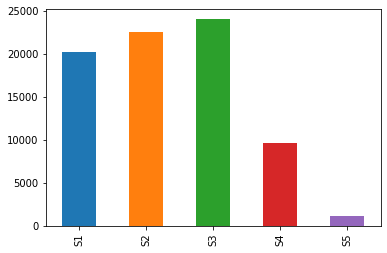

In [7]:
BD.Prioridad.value_counts(sort=False)#.plot('bar')
pd.Categorical(BD.Prioridad).value_counts().plot('bar')

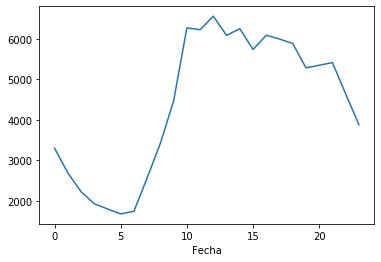

In [8]:
BD.groupby(BD.Fecha.dt.hour).Id.count().plot()


Fecha
2018-01    2299
2018-02    3513
2018-03    3855
2018-04    3542
2018-05    4144
2018-06    4164
2018-07    4011
2018-08    4558
2018-09    4125
2018-10    4163
2018-11    4283
2018-12    4653
2019-01    4532
2019-02    4077
2019-03    4498
2019-04    4152
2019-05    4177
2019-06    3977
2019-07    4605
2019-08    4567
2019-09    4497
2019-10    4849
2019-11    4566
2019-12    4855
2020-01    4855
Freq: M, Name: Id, dtype: int64

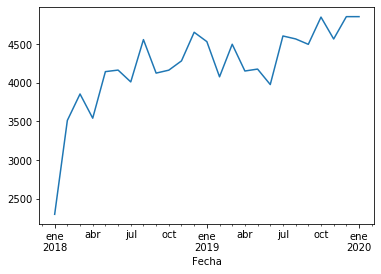

In [9]:
#atenciones mensuales
BD.groupby(BD.Fecha.dt.to_period('M')).Id.count()
BD.groupby(BD.Fecha.dt.to_period('M')).Id.count().plot()

(0, 110)

Text(0.5, 1.0, 'Histograma edad')

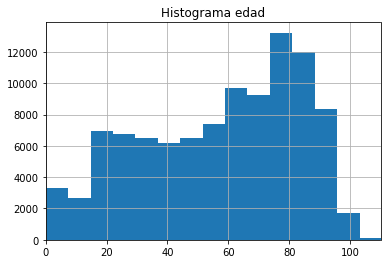

In [10]:
BD.Edad.hist(bins=30)
plt.xlim([0,110])
plt.title('Histograma edad')

In [11]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

count                     39830
mean     0 days 00:07:51.595229
std      0 days 00:18:49.292203
min             0 days 00:00:02
25%             0 days 00:00:47
50%             0 days 00:03:03
75%             0 days 00:07:50
max             1 days 02:44:39
Name: Diff_Despacho_Salida, dtype: object

(0, 10)

Text(0.5, 1.0, 'Diff salida  indicada vs real')

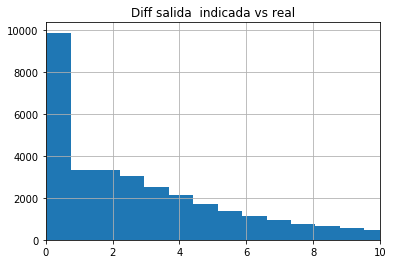

In [12]:
BD.Diff_Despacho_Salida.describe()
(BD.Diff_Despacho_Salida.dt.seconds/60).hist(bins=1000)
plt.xlim([0,10])
plt.title('Diff salida  indicada vs real')

In [13]:
BD['En Regulación'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: En Regulación, dtype: datetime64[ns]

count                     39830
mean     0 days 00:07:51.595229
std      0 days 00:18:49.292203
min             0 days 00:00:02
25%             0 days 00:00:47
50%             0 days 00:03:03
75%             0 days 00:07:50
max             1 days 02:44:39
Name: Diff_Despacho_Salida, dtype: object

(0, 10)

Text(0.5, 1.0, 'Diff salida  indicada vs real')

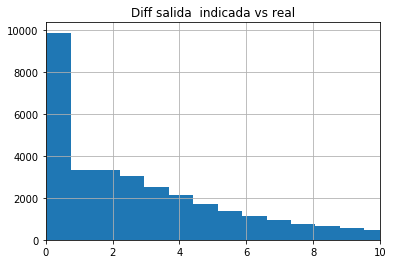

In [14]:
BD.Diff_Despacho_Salida.describe()
(BD.Diff_Despacho_Salida.dt.seconds/60).hist(bins=1000)
plt.xlim([0,10])
plt.title('Diff salida  indicada vs real')

In [15]:
# BD.Doctor.value_counts()
BD.columns
BD[[ 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico']].head(2)

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

,En Regulación,En Despacho,En Curso,Atendida,Completado,Regulado,Usuario que Cierra,Móvil Agregado,Móvil Despachado,Móvil Salida,...,Móvil Camilla Retenida,Móvil Vuelta a Base,Móvil LLegada a Base,Móvil Finalizado,Nombre Vehículo,Tipo Requerido,Tipo Despachado,Km Recorrido,Chofer,Paramédico
0,NaT,2020-02-01 02:59:47,2020-02-01 03:02:55,NaT,2020-02-01 03:25:38,NaT,Roberto Quinlan E.,NaT,2020-02-01 03:01:35,2020-02-01 03:02:46,...,NaT,2020-02-01 03:09:33,2020-02-01 03:25:32,2020-02-01 03:25:38,R23,m2,m2,5,Leonardo David Quiroz Alvarez,Nicolás Silva morales
1,NaT,NaT,NaT,NaT,2020-02-01 04:43:04,NaT,Luz Maria Gonzalez Nuñez,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaN,NaN,NaN,No informado,NaN,NaN


# Solicitudes al CR

In [16]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

In [17]:
# BD.Comuna.value_counts()#.sum()

sector_vina = BD.loc[(BD.Comuna == 'Viña del Mar') | (BD.Comuna == 'Concón') |
             (BD['Nombre Vehículo'].str.contains('R2'))
            ].copy()

sector_quilpue = BD.loc[(BD.Comuna == 'Quilpué') | (BD.Comuna == 'Villa Alemana') |
             (BD['Nombre Vehículo'].str.contains('R3'))
            ].copy()

sector_quillota = BD.loc[(BD.Comuna == 'Quillota') |
             (BD['Nombre Vehículo'].str.contains('R6'))
            ].copy()

sector_quintero = BD.loc[(BD.Comuna == 'Quintero') | (BD.Comuna == 'Puchuncaví') | 
             (BD['Nombre Vehículo'].str.contains('R1'))
            ].copy()

sector_ligua = BD.loc[(BD.Comuna == 'La Ligua') | (BD.Comuna == 'Nogales') |
                      (BD.Comuna == 'Zapallar') |
             (BD['Nombre Vehículo'].str.contains('R8'))
            ].copy()

sector_otros =  BD.loc[(BD.Id.isin(sector_vina.Id)==False) &
                       (BD.Id.isin(sector_quilpue.Id)==False) &
                       (BD.Id.isin(sector_quillota.Id)==False) &
                       (BD.Id.isin(sector_quintero.Id)==False) &
                       (BD.Id.isin(sector_ligua.Id)==False) 
                      ].copy()

sectores = [sector_vina, sector_quilpue, sector_quillota,
            sector_quintero, sector_ligua, sector_otros]

'Viña del Mar'

'Quilpué'

'Quillota'

'Quintero'

'La Ligua'

'Limache'

Text(0, 0.5, 'Cantidad de atenciones')

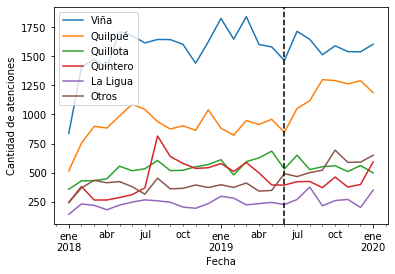

In [18]:
for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    comun
    x.groupby(x.Fecha.dt.to_period('M')).Id.count().plot(label=str(comun))

plt.legend(['Viña', 'Quilpué', 'Quillota','Quintero', 'La Ligua', 'Otros'], loc ='upper left')

plt.ylabel('Cantidad de atenciones')

plt.axvline(593, color='k', linestyle='--')


Solicitudes por día de los distintos sectores

In [19]:
print("Total")

(BD.groupby(BD.Fecha.dt.to_period('M')).Id.count()/30).mean()

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    (x.groupby(x.Fecha.dt.to_period('M')).Id.count()/30).mean()


Total


140.68933333333334

Viña del Mar


52.23866666666667

Quilpué


32.885333333333335

Quillota


17.912

Quintero


15.014666666666667

La Ligua


8.150666666666664

Limache


14.547999999999996

brecha oportunidad

In [20]:
oportunidad = pd.DataFrame(index=['Igual', 'Menor', 'Mayor', 'Total'])

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum = pd.crosstab(x['Tipo Requerido'],
                      x['Tipo Despachado'], dropna=False)
    
    igual = dum.loc['m1']['m1'] + dum.loc['m2']['m2'] + dum.loc['m3']['m3']
    menor = (dum.loc['m2']['m1'] +
             dum.loc['m3']['m2'] + dum.loc['m3']['m1']  )
    mayor = (dum.loc['m1']['m2'] + dum.loc['m1']['m3'] + dum.loc['m2']['m3'])
    
    res = [igual, menor, mayor, dum.sum().sum()]
    oportunidad[comun] = res
    
dum = oportunidad.rename(columns={oportunidad.columns[-1]: 'Otros'})
dum
print('Brecha de oportunidad de recursos menores a los indicados')
(dum.loc['Menor']/ dum.loc['Total'])*100

    

Viña del Mar
Quilpué
Quillota
Quintero
La Ligua
Limache


,Viña del Mar,Quilpué,Quillota,Quintero,La Ligua,Otros
Igual,20870,11142,8151,8062,4425,3252
Menor,1015,997,171,257,100,429
Mayor,718,256,361,174,75,47
Total,22659,12404,8687,8496,4602,3732


Brecha de oportunidad de recursos menores a los indicados


Viña del Mar     4.479456
Quilpué          8.037730
Quillota         1.968459
Quintero         3.024953
La Ligua         2.172968
Otros           11.495177
dtype: float64

In [21]:
op_SAMU = (
    (dum.loc['Menor']/ dum.loc['Total'])*100)[
    ['Viña del Mar', 'Quillota', 'Quintero', 'La Ligua']].mean()
op_HQ = (
    (dum.loc['Menor']/ dum.loc['Total'])*100)[['Quilpué']].mean()
print('Brecha oportunidad bases SAMU en %:', op_SAMU)
print('Brecha oportunidad teritorio hosp Quilpué %:', op_HQ)
op_HQ/op_SAMU

Brecha oportunidad bases SAMU en %: 2.9114590241730873
Brecha oportunidad teritorio hosp Quilpué %: 8.037729764592067


2.760722269438411

In [22]:
BD.columns
pd.DataFrame(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud'])

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

,0
0,Id
1,Fecha
2,Motivo del Llamado
3,Submotivo del Llamado
4,Prioridad
5,Estado
6,Edad
7,Género
8,Dirección
9,Sector


salidas por día según sector

In [23]:
print("Total")
dum = BD.loc[(BD['Nombre Vehículo'].isna() == False) &
                 (BD.Fecha > pd.Timestamp('2019-01-01'))
            ]
total = dum.groupby(dum.Fecha.dt.to_period('D')).Id.count().mean()
total

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum  = x.loc[(x['Nombre Vehículo'].isna() == False) &
                 (x.Fecha > pd.Timestamp('2019-01-01'))
    ]
    valor = dum.groupby(dum.Fecha.dt.to_period('D')).Id.count().mean()
    print(round(valor, 4), '(', round(valor/total*100, 4), ')%')

Total


82.29040404040404

Viña del Mar
28.9444 ( 35.1735 )%
Quilpué
20.5758 ( 25.0038 )%
Quillota
12.3763 ( 15.0397 )%
Quintero
11.5505 ( 14.0363 )%
La Ligua
6.3232 ( 7.684 )%
Limache
4.5733 ( 5.5575 )%


In [24]:
((BD.groupby(BD.Fecha.dt.hour).Id.count())[list(range(8,20,1))]/(24*60))#.mean()
((BD.groupby(BD.Fecha.dt.hour).Id.count())[list(range(0,7,1))+list(range(20,24,1))]/(24*60))#.mean()

Fecha
8     2.376389
9     3.104167
10    4.358333
11    4.327083
12    4.558333
13    4.229167
14    4.345139
15    3.986806
16    4.231944
17    4.165972
18    4.090278
19    3.670833
Name: Id, dtype: float64

Fecha
0     2.291667
1     1.868056
2     1.544444
3     1.335417
4     1.246528
5     1.161111
6     1.206250
20    3.715972
21    3.761806
22    3.224306
23    2.693750
Name: Id, dtype: float64

In [25]:
BD.groupby(BD.Fecha.dt.to_period('H')).Id.count()


# BD.groupby(BD.Fecha.dt.to_period('H')).Id.count().mean()
# (BD.groupby(BD.Fecha.dt.hour).Id.count())/(24*60)

# BD.groupby(BD.Fecha.dt.to_period('H')).Id.count()[list(range(8,20,1))].sum()
# BD.groupby(BD.Fecha.dt.to_period('H')).Id.count()[list(range(0,7,1))+list(range(20,24,1))].sum()

Fecha
2018-01-15 08:00     3
2018-01-15 09:00     8
2018-01-15 10:00     5
2018-01-15 11:00     7
2018-01-15 12:00     9
2018-01-15 13:00     8
2018-01-15 14:00     5
2018-01-15 15:00    14
2018-01-15 16:00     6
2018-01-15 17:00    10
2018-01-15 18:00     6
2018-01-15 19:00    10
2018-01-15 20:00     5
2018-01-15 21:00     3
2018-01-15 22:00     8
2018-01-15 23:00     3
2018-01-16 00:00     2
2018-01-16 01:00     7
2018-01-16 02:00     2
2018-01-16 03:00     3
2018-01-16 04:00     3
2018-01-16 05:00     1
2018-01-16 07:00     5
2018-01-16 08:00     1
2018-01-16 09:00     7
2018-01-16 10:00     7
2018-01-16 11:00     5
2018-01-16 12:00     4
2018-01-16 13:00     3
2018-01-16 14:00     5
                    ..
2020-01-30 17:00    11
2020-01-30 18:00    13
2020-01-30 19:00     6
2020-01-30 20:00     7
2020-01-30 21:00    11
2020-01-30 22:00     7
2020-01-30 23:00     7
2020-01-31 00:00     5
2020-01-31 01:00     6
2020-01-31 02:00     4
2020-01-31 03:00     2
2020-01-31 04:00     2
2020-

In [26]:
dum  = BD.loc[(BD['Nombre Vehículo'].isna() == False)]

print('Salidas diarias promedio')
(dum.groupby(dum.Fecha.dt.to_period('M')).Id.count()/30).mean()

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum  = x.loc[(x['Nombre Vehículo'].isna() == False) &
                 (x.Fecha > pd.Timestamp('2019-01-01'))
    ]
    (dum.groupby(dum.Fecha.dt.to_period('M')).Id.count()/30).mean()

Salidas diarias promedio


68.86666666666666

Viña del Mar


29.38974358974359

Quilpué


20.892307692307693

Quillota


12.566666666666666

Quintero


11.728205128205131

La Ligua


6.42051282051282

Limache


4.561538461538461

In [27]:
# no estoy seguro de esto.....

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum  = x.loc[(x['Nombre Vehículo'].isna() == False) &
                 (x.Fecha > pd.Timestamp('2019-01-01'))
    ]
    t_dia = (
        (dum.groupby(dum.Fecha.dt.hour).Id.count())[
            list(range(8,20,1))
        ]/(12*60))
    
    t_noche = (
        (dum.groupby(dum.Fecha.dt.hour).Id.count())[
            list(range(0,7,1))+list(range(20,24,1))
        ]/(12*60))
    x.groupby(x.Fecha.dt.to_period('H')).Id.count().mean()
    print('salidas día', t_dia.sum())
    print('salidas noche', t_noche.sum())
    print('')
    

Viña del Mar


2.755010196188735

salidas día 10.152777777777777
salidas noche 5.347222222222221

Quilpué


2.061690211485413

salidas día 6.883333333333333
salidas noche 4.152777777777778

Quillota


1.5657342657342657

salidas día 4.215277777777778
salidas noche 2.459722222222222

Quintero


1.5813790198005897

salidas día 3.9972222222222222
salidas noche 2.225

La Ligua


1.3482576091751213

salidas día 2.2805555555555554
salidas noche 1.1347222222222222

Limache


1.5128951747088186

salidas día 1.5624999999999998
salidas noche 0.8472222222222221



Reporte mensual
=====================

In [30]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

In [36]:
BD.Fecha.describe()
BD.groupby(BD.Fecha.dt.to_period('M')).Id.count()


count                  105517
unique                  91842
top       2018-11-23 14:30:10
freq                      442
first     2018-01-15 08:45:15
last      2020-01-31 23:58:13
Name: Fecha, dtype: object

4220.68

In [42]:
tab_frec(BD['Motivo del Llamado'])
tab_frec(BD['Tipo Despachado'])
tab_frec(BD['Prioridad'])


,n,%
Motivo del Llamado,,
Accidentes y Traumas,24998,23.69
Dolor o Problema específico,24445,23.17
Traslados,18903,17.92
Consciencia,12343,11.70
Sin patología urgencia,9451,8.96
Otro,8069,7.65
Colapso,5112,4.85
Intoxicación,2189,2.07
Total,105510,100.01


,n,%
Tipo Despachado,,
m1,38328,60.19
m2,23384,36.72
m3,1881,2.95
x5,84,0.13
Total,63677,99.99


,n,%
Prioridad,,
S3,24075,30.98
S2,22548,29.02
S1,20238,26.04
S4,9624,12.39
S5,1221,1.57
Total,77706,100.00


In [52]:
BD['Móvil Camilla Retenida'].isna().value_counts(normalize=True)

True     0.945459
False    0.054541
Name: Móvil Camilla Retenida, dtype: float64